# Kaggle installation

These are steps to be followed to import the kaggle dataset to the colab runspace

In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 2.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=c6b0d4d70ca2602c7d1d676f4381fc9099167ce35b1b10e66b368225faf4f9d4
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


Download the kaggle.json api token from your kaggle account and upload here


In [2]:
#download kaggle.json from your account from create new api token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pranavaramanbms","key":"34b741a6073b028c2af6dac99de176e4"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download sovitrath/diabetic-retinopathy-2015-data-colored-resized

 99% 1.92G/1.94G [01:02<00:00, 32.1MB/s]
100% 1.94G/1.94G [01:02<00:00, 33.1MB/s]


Exporting the files from the dataset.

In [6]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "diabetic-retinopathy-2015-data-colored-resized.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    #zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

Extracting all the files now...
Done!


# Imports & model import


In [7]:
import os
import numpy as np
import tensorflow as tf
import math
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd 

**Mount your google drive**

* Create a shortcut to the model file to your desired location on your Drive
* Import the file from the drive using the given code

[Click here to get the model file](https://drive.google.com/file/d/1S-NrS5h4jG_OkuEt7dqUhKj6dlHD7viO/view?usp=sharing)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:

#!cp $from_location $to_location

!cp '/content/drive/MyDrive/Machine_Learning_Model_Files/retinopathy/Final model/vgg16_Model_Retinopathy_new_new.zip' 'original_model.zip'

**Model Details**

Model Courtesy: Team - Sreeratcha and Preeti Krishnaveni

* This is a binary_classification model trained using transfer-learning of "VGG16" to the current requirement
* This model has a training accuracy of: 87% and testing accuracy of: 65%
* for an almost balanced dataset of 13.5k images

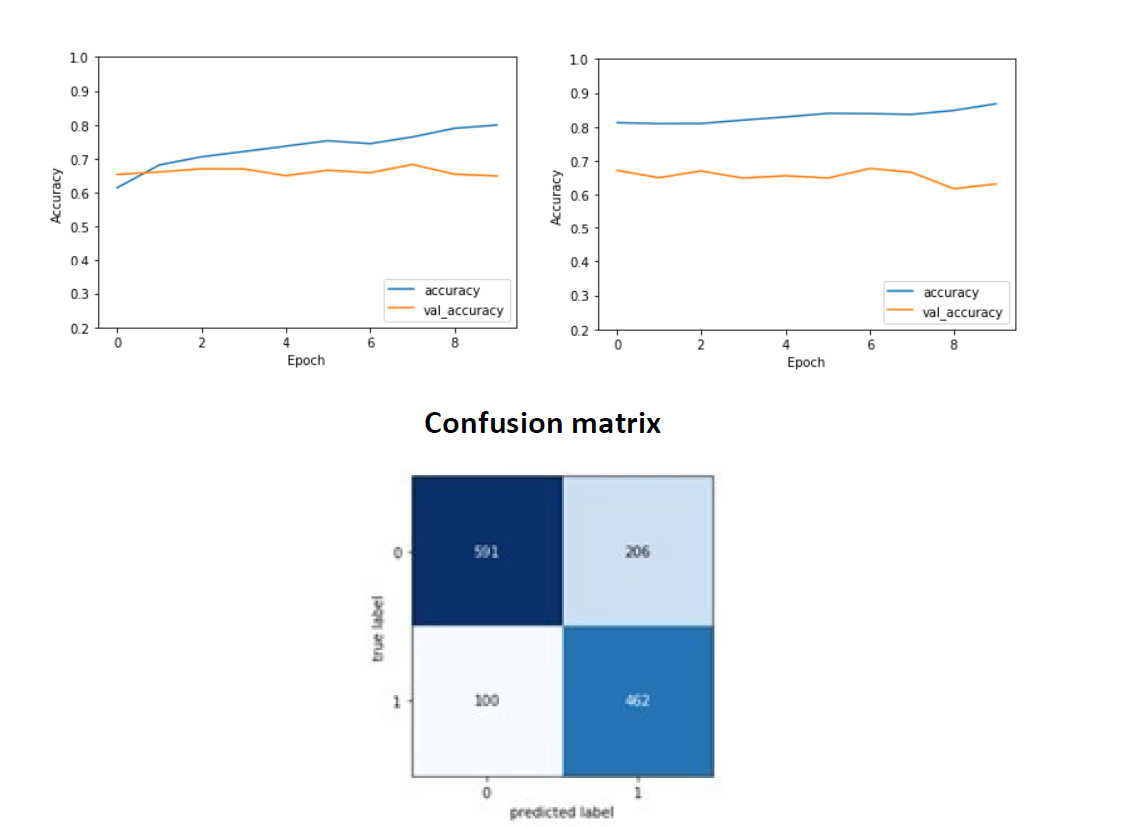


In [10]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "original_model.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
saved_model/                                   2021-06-24 04:10:24            0
saved_model/vgg16_Model_Retinopathy_new_new/   2021-06-24 04:10:26            0
saved_model/vgg16_Model_Retinopathy_new_new/variables/ 2021-06-24 04:10:26            0
saved_model/vgg16_Model_Retinopathy_new_new/variables/variables.data-00000-of-00001 2021-06-24 04:10:26    367178332
saved_model/vgg16_Model_Retinopathy_new_new/variables/variables.index 2021-06-24 04:10:26         3191
saved_model/vgg16_Model_Retinopathy_new_new/assets/ 2021-06-24 04:10:26            0
saved_model/vgg16_Model_Retinopathy_new_new/keras_metadata.pb 2021-06-24 04:10:26        53570
saved_model/vgg16_Model_Retinopathy_new_new/saved_model.pb 2021-06-24 04:10:26       377406
Extracting all the files now...
Done!


# Model Loading

In [11]:
#set the location to your model's location
model_location = 'saved_model/vgg16_Model_Retinopathy_new_new'

from tensorflow.keras.models import load_model
model = load_model(model_location)
model.trainable = False

In [12]:
#change to your model's input img_size
img_size = 224 

# custom-preprocessing function
def preprocessing_image(data):
    img_resize = cv2.resize(data, dsize=(img_size, img_size))
    image = np.array(img_resize, dtype='float32')
    image = tf.expand_dims(image,0)
    return image

#function that returns the predicted value
def prediction(data):
    value = model.predict(data)   
    return value[0][0]

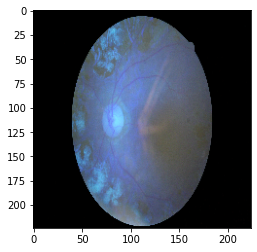

0.6380057


In [13]:
#checking if the model works

image_location = 'colored_images/colored_images/Proliferate_DR/10017_left.png'

image = cv2.imread(image_location)
plt.imshow(image)
image = preprocessing_image(image)
plt.show()
pred = prediction(image)
print(pred)

# Attacker's model Creation


## datageneration

Data that the attacker has

In [14]:

img = [] #create a list of (image, prediction_label)
i=0
for data in os.listdir('colored_images/colored_images/No_DR'):
        img_d = cv2.imread('colored_images/colored_images/No_DR/{}'.format(data))
        img_d = preprocessing_image(img_d)
        pred = prediction(img_d)  #get the prediction from the original model

        y_val = 0
        if pred>0.5:
          y_val = 1   #change the label

        img.append([img_d, y_val])    #append the image along with label in the list
        i+=1
        if i>=1000:
          break

#do it for all classes (1000 for No_DR), (250 each for other 4)

In [15]:

i=0
for data in os.listdir('colored_images/colored_images/Mild'):
        img_d = cv2.imread('colored_images/colored_images/Mild/{}'.format(data))
        img_d = preprocessing_image(img_d)
        pred = prediction(img_d)

        y_val = 0
        if pred>0.5:
          y_val = 1
          
        img.append([img_d, y_val])
        i+=1
        if i>=250:
          break


i=0
for data in os.listdir('colored_images/colored_images/Moderate'):
        img_d = cv2.imread('colored_images/colored_images/Moderate/{}'.format(data))
        img_d = preprocessing_image(img_d)
        pred = prediction(img_d)

        y_val = 0
        if pred>0.5:
          y_val = 1
          
        img.append([img_d, y_val])
        i+=1
        if i>=250:
          break

i=0
for data in os.listdir('colored_images/colored_images/Proliferate_DR'):
        img_d = cv2.imread('colored_images/colored_images/Proliferate_DR/{}'.format(data))
        img_d = preprocessing_image(img_d)
        pred = prediction(img_d)

        y_val = 0
        if pred>0.5:
          y_val = 1
          
        img.append([img_d, y_val])
        i+=1
        if i>=250:
          break

i=0
for data in os.listdir('colored_images/colored_images/Severe'):
        img_d = cv2.imread('colored_images/colored_images/Severe/{}'.format(data))
        img_d = preprocessing_image(img_d)
        pred = prediction(img_d)

        y_val = 0
        if pred>0.5:
          y_val = 1
          
        img.append([img_d, y_val])
        i+=1
        if i>=250:
          break

In [16]:
img = np.array(img, dtype=object)
img[0][1]

0

New Histogram:


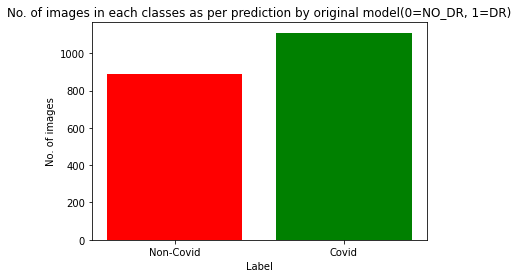

In [17]:
img = np.array(img, dtype=object)
num_zeros = (img[:,1] == 0).sum()
num_ones = (img[:,1] == 1).sum()
print("New Histogram:")
plt.title('No. of images in each classes as per prediction by original model(0=NO_DR, 1=DR)')
plt.ylabel('No. of images')
plt.xlabel('Label')
plt.bar(["Non-Covid", "Covid"], [num_zeros, num_ones] , color=["red", "green"])
plt.show()


## dataset separation

In [18]:
import random
from sklearn.model_selection import train_test_split
random.shuffle(img)
X_img = []
Y_lab = []
for data in img:
    X_img.append(data[0][0])
    Y_lab.append(data[1])

X_arr_img = np.array(X_img)

X_train, X_test, Y_train, Y_test = train_test_split(X_arr_img, Y_lab, test_size=0.2)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1600, 224, 224, 3)
(400, 224, 224, 3)
(1600,)
(400,)


# PGD ATTACK

This function computes the L-2 Norm of the given matrix


---



*   First it converts the 3d matrix into a 1d array
*   Then it performs L-2 norm where 
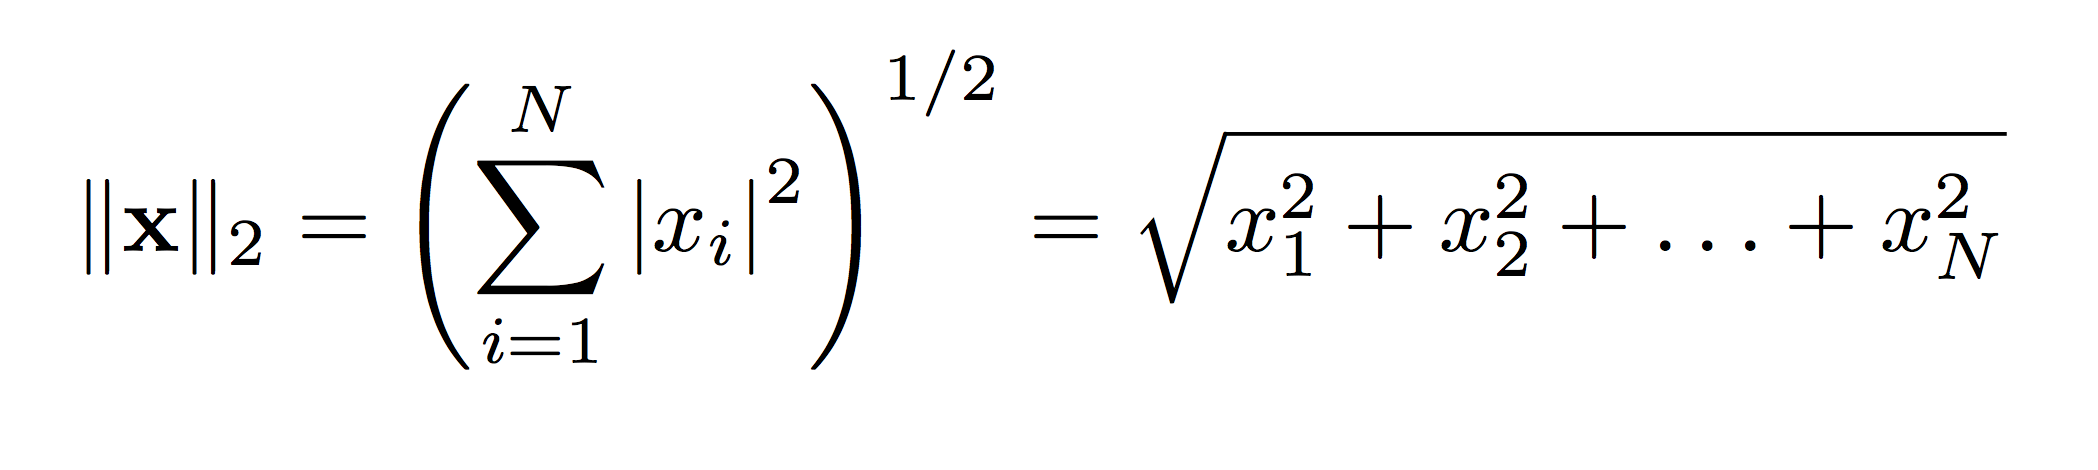
*   Then the normalized output is returned




In [20]:
def l2_norm(z):
    """Compute norms over all but the first dimension"""

    mat = z.numpy()
    mat = mat.reshape((mat.shape[0], -1))
    out = np.linalg.norm(mat, ord=2)
    return out

    # The pytorch version of the code
    # return Z.view(Z.shape[0], -1).norm(dim=1)[:,None,None,None]

 **PGD Function**

The PGD used here is an iterative version of ‘Normalized Steepest Gradient Descent’. It perturbs a normal example x for a number of steps with the step size α being set between ϵ /T to ϵ. Here again we have made the model to iterate till it’s loss reaches a certain value

**Repeat:**
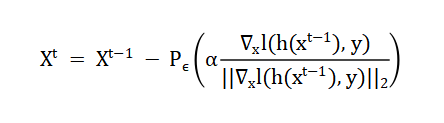





Some of the references used while creating this PGD are listed below:
* [Adversarial Examples, solving the inner maximization](https://adversarial-ml-tutorial.org/adversarial_examples/)
 - This helped us understand PGD much better and implemented in a better way
* [Understanding Adversarial Attacks on Deep Learning Based
Medical Image Analysis Systems](https://arxiv.org/pdf/1907.10456.pdf)


**The inner_pgd function returns the delta after one step**

The normalized steepest descent method has been used to find the noise to be 
added to the the image.

In contrast to Fast Gradient Sign Method, where
```
delta = alpha * tf.sign(grad)
```

We are us
```
delta = alpha  * (grad/l2_norm(grad))
```

In [21]:
def inner_pgd(x, y_adv, alpha):
    loss_func = tf.keras.losses.BinaryCrossentropy()
    with tf.GradientTape() as gt:
        gt.watch(x)
        
        label = model(x)
        loss = loss_func(y_adv, label)
        outputloss = loss.numpy()
        #print (loss)
        
    grad = gt.gradient(loss, x)


    norm_grad = l2_norm(grad)
    #here it is an implementation of normalized steepest descent
    if norm_grad:
      delta = alpha  * (grad/norm_grad)
    else:
      delta = alpha * tf.sign(grad)

    return delta, outputloss
    

**Projection function:**

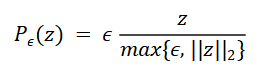

This particular projection function was mentioned in this article:

[Source](https://adversarial-ml-tutorial.org/adversarial_examples/)

In [22]:
def projection(x, eps):
  norm_x = l2_norm(x)
  out = eps * (x / np.maximum(eps, norm_x))*255
  
  #here we found that the output value is very less because the value 
  #becomes in the range of 0 to 1 while the image is in the range of 0-255
  #so the output is multiplied with 255

  return out


In contrast with many places where the number of iterations for the PGD is already given,

here the iteration goes on until the loss for the given image and desired target becomes lesser that a certain threshold (in this case 0.5), the attack stops

Of course, this is not always the desirable way to do, as there is no fixed timeline for the attack to finish.

On our experiences usualy an image takes about 6-7 iterations

In [23]:
def PGD(x, y_adv, eps):

  # attack changes from BIM to Madry's PGD
  delta = np.random.uniform(-eps,eps,x.shape)
  x = x+delta

  alpha = eps/10

  itr = 0

  while 1:
    noise, loss = inner_pgd(x, y_adv,alpha)
    #noise_new = tf.clip_by_value(x-noise-img, -eps, eps)
    noise_new = projection(noise , eps)
    x = x - noise_new
    #x = projection(x, eps)
    #print(x)

    #preds = new_model.predict(x)
    #print(preds)

    itr+=1
    if loss<1e-5 or itr>=10:
      break

  return x, itr


## creation of perturbed data

Here we will see an example of how the image is affected by the adversarial attack

**Create_Perturb**

This function takes in the image details and target value (to which the image has to change to) and saves the perturbed image in the given destination.

In [30]:
def create_perturb_pgd(old_img, image_name, tofolder, y_val):
  #old_img = cv2.imread(fromfolder+'/'+image_name)
  old_img = preprocessing_image(old_img)

  #actual prediction by the model
  preds = model.predict(old_img)
  print("The prediction of the image before attack: ", preds)

  #y_val = 0
    
  #if preds[0][0]<0.5:
    #y_val = 1
    
  #target value
  y_adv_label = y_val
  y_adv = tf.reshape(y_adv_label, shape=[1, preds.shape[-1]])


  #adverserial image


  x_adv, itrs = PGD(old_img, y_adv, 1.4)

  #here noise is calculated to display it, it is not necessary to show the noise
  #noise = x_adv - img
  #plt.imshow(noise[0])
  #plt.show()


  #prediction by the model after adversarial attack
  newpreds = model.predict(x_adv)
  print("The prediction of the image after %d iterations of PGD attack: %f" % ( itrs, newpreds[0][0]))

  #saving image to the destination
  save_img(tofolder+'/'+image_name, x_adv[0])

Example image:-

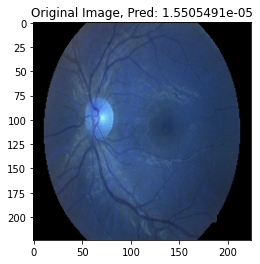

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


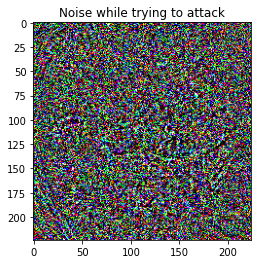

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The prediction of the image after 4 iterations of PGD attack 1.000000


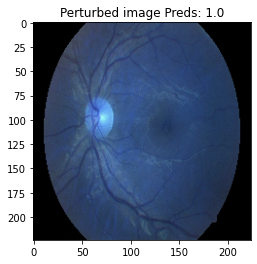

In [26]:
which_number = 94

#new_img = img[which_number][0]
#actual_label = img[which_number][1]

new_img = X_train[which_number]
actual_label = Y_train[which_number]

new_img = preprocessing_image(new_img)

y_label = 0
if actual_label==0:
  y_label = 1

old_pred = model.predict(new_img)
plt.imshow(new_img[0]/255)
plt.title('Original Image, Pred: '+str(old_pred[0][0]))
plt.show()

y_adv = tf.reshape(y_label, shape=[1, old_pred.shape[-1]])

x_adv, itrs = PGD(new_img, y_adv, 1.4)

noise = x_adv - new_img
plt.imshow(noise[0])
plt.title('Noise while trying to attack')
plt.show()

new_preds = model.predict(x_adv)
print("The prediction of the image after %d iterations of PGD attack %f" % ( itrs, new_preds[0][0]))

plt.imshow(x_adv[0]/255)
plt.title('Perturbed image Preds: '+str(new_preds[0][0]))
plt.show()


In [27]:
!mkdir PGD_WBA_Retinopathy_perturbed_img


In [28]:
!mkdir PGD_WBA_Retinopathy_perturbed_img/No_DR
!mkdir PGD_WBA_Retinopathy_perturbed_img/DR

In [31]:
dr = 0
no_dr = 0

for i,d in enumerate(X_train):
  print(i)
  if Y_train[i] == 1:
    create_perturb_pgd(d, 'DR('+str(dr)+').png', 'PGD_WBA_Retinopathy_perturbed_img/DR/', 0)
    print('DR('+str(dr)+').png')
    dr+=1
  else:
    create_perturb_pgd(d, 'No_DR('+str(no_dr)+').png', 'PGD_WBA_Retinopathy_perturbed_img/No_DR/', 1)
    print('No_DR('+str(no_dr)+').png')
    no_dr+=1


    

Streaming output truncated to the last 5000 lines.
350
The prediction of the image before attack:  [[0.22130303]]
The prediction of the image after 10 iterations of PGD attack: 0.509288
No_DR(235).png
351
The prediction of the image before attack:  [[0.33223185]]
The prediction of the image after 3 iterations of PGD attack: 1.000000
No_DR(236).png
352
The prediction of the image before attack:  [[0.00128591]]
The prediction of the image after 10 iterations of PGD attack: 0.509288
No_DR(237).png
353
The prediction of the image before attack:  [[0.0004861]]
The prediction of the image after 3 iterations of PGD attack: 1.000000
No_DR(238).png
354
The prediction of the image before attack:  [[0.00047166]]
The prediction of the image after 10 iterations of PGD attack: 0.509288
No_DR(239).png
355
The prediction of the image before attack:  [[4.538087e-06]]
The prediction of the image after 10 iterations of PGD attack: 0.509288
No_DR(240).png
356
The prediction of the image before attack:  [[

In [32]:
for i,d in enumerate(X_test):
  print(i)
  if Y_test[i] == 1:
    create_perturb_pgd(d, 'DR('+str(dr)+').png', 'PGD_WBA_Retinopathy_perturbed_img/DR/', 0)
    print('DR('+str(dr)+').png')
    dr+=1
  else:
    create_perturb_pgd(d, 'No_DR('+str(no_dr)+').png', 'PGD_WBA_Retinopathy_perturbed_img/No_DR/', 1)
    print('No_DR('+str(no_dr)+').png')
    no_dr+=1


    

0
The prediction of the image before attack:  [[0.28679806]]
The prediction of the image after 4 iterations of PGD attack: 1.000000
No_DR(1084).png
1
The prediction of the image before attack:  [[0.25840592]]
The prediction of the image after 4 iterations of PGD attack: 1.000000
No_DR(1085).png
2
The prediction of the image before attack:  [[0.29145992]]
The prediction of the image after 10 iterations of PGD attack: 0.509288
No_DR(1086).png
3
The prediction of the image before attack:  [[0.01522229]]
The prediction of the image after 10 iterations of PGD attack: 0.509288
No_DR(1087).png
4
The prediction of the image before attack:  [[0.45574003]]
The prediction of the image after 4 iterations of PGD attack: 1.000000
No_DR(1088).png
5
The prediction of the image before attack:  [[0.05694441]]
The prediction of the image after 3 iterations of PGD attack: 1.000000
No_DR(1089).png
6
The prediction of the image before attack:  [[0.00337618]]
The prediction of the image after 3 iterations of

In [33]:
!zip -r ./PGD_WBA_Retinopathy_perturbed_img.zip ./PGD_WBA_Retinopathy_perturbed_img/

  adding: PGD_WBA_Retinopathy_perturbed_img/ (stored 0%)
  adding: PGD_WBA_Retinopathy_perturbed_img/No_DR/ (stored 0%)
  adding: PGD_WBA_Retinopathy_perturbed_img/No_DR/No_DR(877).png (deflated 0%)
  adding: PGD_WBA_Retinopathy_perturbed_img/No_DR/No_DR(744).png (deflated 0%)
  adding: PGD_WBA_Retinopathy_perturbed_img/No_DR/No_DR(762).png (deflated 0%)
  adding: PGD_WBA_Retinopathy_perturbed_img/No_DR/No_DR(255).png (deflated 0%)
  adding: PGD_WBA_Retinopathy_perturbed_img/No_DR/No_DR(1184).png (deflated 0%)
  adding: PGD_WBA_Retinopathy_perturbed_img/No_DR/No_DR(1089).png (deflated 0%)
  adding: PGD_WBA_Retinopathy_perturbed_img/No_DR/No_DR(986).png (deflated 0%)
  adding: PGD_WBA_Retinopathy_perturbed_img/No_DR/No_DR(771).png (deflated 0%)
  adding: PGD_WBA_Retinopathy_perturbed_img/No_DR/No_DR(187).png (deflated 0%)
  adding: PGD_WBA_Retinopathy_perturbed_img/No_DR/No_DR(1317).png (deflated 0%)
  adding: PGD_WBA_Retinopathy_perturbed_img/No_DR/No_DR(1335).png (deflated 0%)
  addin

In [35]:
!cp PGD_WBA_Retinopathy_perturbed_img.zip '/content/drive/MyDrive/Machine_Learning_Model_Files/PGD_WBA_Retinopathy_perturbed_img.zip'

# Faulty Prediction (PGD)

In [ ]:
!cp '/content/drive/MyDrive/Machine_Learning_Model_Files/PGD_WBA_Retinopathy_perturbed_img.zip' PGD_WBA_Retinopathy_perturbed_img.zip

In [ ]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "PGD_WBA_Retinopathy_perturbed_img.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    #zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

Extracting all the files now...
Done!


In [79]:
import cv2

dr_img = []
for data in os.listdir('PGD_WBA_Retinopathy_perturbed_img/DR'):
        img_d = cv2.imread('PGD_WBA_Retinopathy_perturbed_img/DR/{}'.format(data))
        dr_img.append(img_d)

        
no_dr_img = []        
for data in os.listdir('PGD_WBA_Retinopathy_perturbed_img/No_DR'):
        img_d = cv2.imread('PGD_WBA_Retinopathy_perturbed_img/No_DR/{}'.format(data))        
        no_dr_img.append(img_d)

      

In [80]:
dr_img = np.array(dr_img)
dr_pred_0 = model.predict(dr_img)


In [81]:
dr_img_pred_int = []
for i in dr_pred_0:
  if i < 0.5:
    dr_img_pred_int.append(0)
  else:
    dr_img_pred_int.append(1)

Total no. of DR images =  651
Predicted as No DR =  614
Predicted as DR =  37


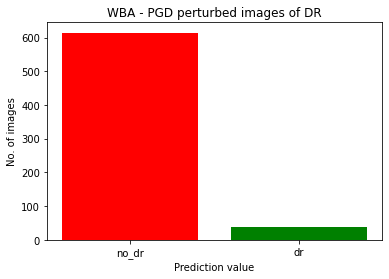

In [82]:
dr_img_pred_int = np.array(dr_img_pred_int)
no_zero = (dr_img_pred_int ==0).sum()
no_one = (dr_img_pred_int==1).sum()
print("Total no. of DR images = ", dr_pred_0.size)
print("Predicted as No DR = ",no_zero)
print("Predicted as DR = ", no_one)

plt.title('WBA - PGD perturbed images of DR')
plt.ylabel('No. of images')
plt.xlabel('Prediction value')
plt.bar(["no_dr", "dr"], [no_zero, no_one] , color=["red", "green"])
plt.show()

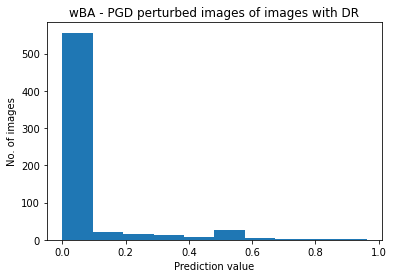

In [83]:
plt.title('wBA - PGD perturbed images of images with DR')
plt.ylabel('No. of images')
plt.xlabel('Prediction value')
plt.hist(dr_pred_0.astype('float'))
plt.show()

In [84]:
no_dr_img = np.array(no_dr_img)
no_dr0_pred = model.predict(no_dr_img)

In [85]:
no_dr_img_pred_int = []
for i in no_dr0_pred:
  if i < 0.5:
    no_dr_img_pred_int.append(0)
  else:
    no_dr_img_pred_int.append(1)

Total no. of No DR images =  1349
Predicted as No DR =  459
Predicted as DR =  890


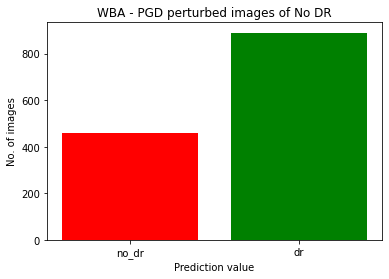

In [86]:
no_dr_img_pred_int = np.array(no_dr_img_pred_int)
no_zero = (no_dr_img_pred_int ==0).sum()
no_one = (no_dr_img_pred_int==1).sum()
print("Total no. of No DR images = ", no_dr0_pred.size)
print("Predicted as No DR = ",no_zero)
print("Predicted as DR = ", no_one)


plt.title('WBA - PGD perturbed images of No DR')
plt.ylabel('No. of images')
plt.xlabel('Prediction value')
plt.bar(["no_dr", "dr"], [no_zero, no_one] , color=["red", "green"])
plt.show()

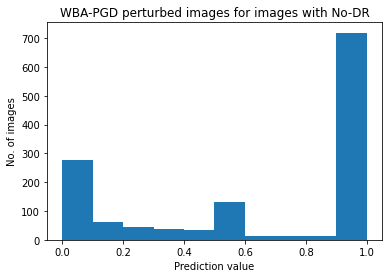

In [87]:
plt.title('WBA-PGD perturbed images for images with No-DR')
plt.ylabel('No. of images')
plt.xlabel('Prediction value')
plt.hist(no_dr0_pred.astype('float'))
plt.show()

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = []
y_pred = []
for i in dr_img_pred_int:
  y_pred.append(i)
  y_true.append(1)

for i in no_dr_img_pred_int:
  y_pred.append(i)
  y_true.append(0)

cnf = confusion_matrix(y_true, y_pred)
cnf

array([[459, 890],
       [614,  37]])

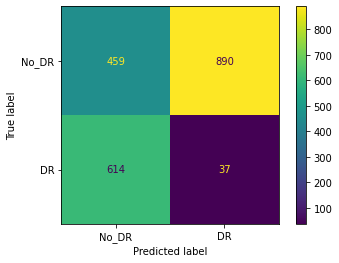

In [89]:
disp = ConfusionMatrixDisplay(cnf,display_labels=["No_DR", "DR"])
disp.plot()

# BIM ATTACK


In [ ]:
!cp '/content/drive/MyDrive/Machine_Learning_Model_Files/retinopathy/Final model/vgg16__Retinopathy_attacker_model.zip' vgg16_Retinopathy_attacker.zip

In [ ]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "vgg16_Retinopathy_attacker.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
attack_model/                                  2021-12-03 04:45:44            0
attack_model/vgg16_Retinopathy_attacker/       2021-12-03 04:45:44            0
attack_model/vgg16_Retinopathy_attacker/variables/ 2021-12-03 04:45:44            0
attack_model/vgg16_Retinopathy_attacker/variables/variables.index 2021-12-03 04:45:44         3191
attack_model/vgg16_Retinopathy_attacker/variables/variables.data-00000-of-00001 2021-12-03 04:45:44    367178308
attack_model/vgg16_Retinopathy_attacker/assets/ 2021-12-03 04:45:44            0
attack_model/vgg16_Retinopathy_attacker/keras_metadata.pb 2021-12-03 04:45:44        53695
attack_model/vgg16_Retinopathy_attacker/saved_model.pb 2021-12-03 04:45:44       324214
Extracting all the files now...
Done!


In [ ]:
#set the location to your model's location
model_location = 'attack_model/vgg16_Retinopathy_attacker'

from tensorflow.keras.models import load_model
new_model = load_model(model_location)
new_model.trainable = False

**FGSM**

For an input image, this method uses the gradients of the loss with respect to the input image to create a new image that maximises the loss. 

In [53]:

def fgsm(x, y_adv, epsilon):
    loss_func = tf.keras.losses.BinaryCrossentropy()
    with tf.GradientTape() as gt:
        gt.watch(x)
        
        label = model(x)
        loss = loss_func(y_adv, label)
        outputloss = loss.numpy()
        #print (loss)
        
    grad = gt.gradient(loss, x)
    gamma = epsilon * tf.sign(grad)
    
    return gamma, outputloss
    

**BIM**

FGSM is performed certain number of times. 

In many cases, the number of iterations is already given. 

But here, a number of iterations are performed until we reach the target. Here, the attack stops once the loss for the given image goes below a particular value (2 in this case).

On an average the number of iterations performed here is 3-4.

The recursive function of BIM is:

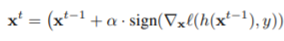

In [49]:
def BIM(x, y_adv, eps):
  alpha = eps/10
  itrs = 0
  while 1:
    noise, loss = fgsm(x, y_adv,alpha)
    #noise = tf.clip_by_value(x-noise-img, -eps, eps)
    x = x - noise

    #preds = new_model.predict(x)
    #print(preds)
    itrs+=1
    if loss<2:
      break

  return x, itrs

This function takes in the image details and target value (to which the image has to change to) and saves the perturbed image in the given destination.

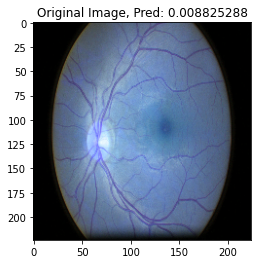

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


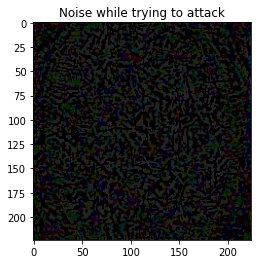

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The prediction of the image after 2 iterations of BIM attack 0.999554


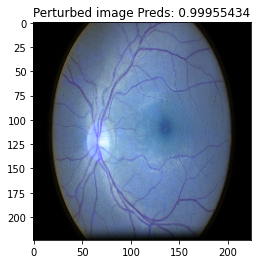

In [54]:
which_number = 4

#new_img = img[which_number][0]
#actual_label = img[which_number][1]

new_img = X_train[which_number]
actual_label = Y_train[which_number]

new_img = preprocessing_image(new_img)
y_label = 0
if actual_label==0:
  y_label = 1

old_pred = model.predict(new_img)
plt.imshow(new_img[0]/255)
plt.title('Original Image, Pred: '+str(old_pred[0][0]))
plt.show()

y_adv = tf.reshape(y_label, shape=[1, old_pred.shape[-1]])

x_adv, itrs = BIM(new_img, y_adv, 0.7)

noise = x_adv - new_img
plt.imshow(noise[0])
plt.title('Noise while trying to attack')
plt.show()

new_preds = model.predict(x_adv)
print("The prediction of the image after %d iterations of BIM attack %f" % ( itrs, new_preds[0][0]))

plt.imshow(x_adv[0]/255)
plt.title('Perturbed image Preds: '+str(new_preds[0][0]))
plt.show()


# perturbation creation


In [59]:
def create_perturb_bim(old_img, image_name, tofolder, y_val):
  #old_img = cv2.imread(fromfolder+'/'+image_name)
  old_img = preprocessing_image(old_img)

  #actual prediction by the model
  preds = model.predict(old_img)
  print("The prediction of the image before attack: ", preds)

    
  #target value
  y_adv_label = y_val
  y_adv = tf.reshape(y_adv_label, shape=[1, preds.shape[-1]])


  #adverserial image


  x_adv, itrs = BIM(old_img, y_adv, 1.4)

  #here noise is calculated to display it, it is not necessary to show the noise
  #noise = x_adv - img
  #plt.imshow(noise[0])
  #plt.show()


  #prediction by the model after adversarial attack
  newpreds = model.predict(x_adv)
  print("The prediction of the image after %d iterations of BIM attack: %f" % ( itrs, newpreds[0][0]))

  #saving image to the destination
  save_img(tofolder+'/'+image_name, x_adv[0])

In [57]:
!mkdir BIM_WBA_retinopathy_perturbed_img
!mkdir BIM_WBA_retinopathy_perturbed_img/No_DR
!mkdir BIM_WBA_retinopathy_perturbed_img/DR

In [60]:
dr = 0
no_dr = 0

for i,d in enumerate(X_train):
  print(i)
  if Y_train[i] == 1:
    create_perturb_bim(d, 'DR('+str(dr)+').png', 'BIM_WBA_retinopathy_perturbed_img/DR/', 0)
    print('DR('+str(dr)+').png')
    dr+=1
  else:
    create_perturb_bim(d, 'No_DR('+str(no_dr)+').png', 'BIM_WBA_retinopathy_perturbed_img/No_DR/', 1)
    print('No_DR('+str(no_dr)+').png')
    no_dr+=1    

Streaming output truncated to the last 5000 lines.
350
The prediction of the image before attack:  [[0.22130303]]
The prediction of the image after 1 iterations of BIM attack: 0.544773
No_DR(235).png
351
The prediction of the image before attack:  [[0.33223185]]
The prediction of the image after 1 iterations of BIM attack: 0.742249
No_DR(236).png
352
The prediction of the image before attack:  [[0.00128591]]
The prediction of the image after 2 iterations of BIM attack: 0.509288
No_DR(237).png
353
The prediction of the image before attack:  [[0.0004861]]
The prediction of the image after 2 iterations of BIM attack: 0.999992
No_DR(238).png
354
The prediction of the image before attack:  [[0.00047166]]
The prediction of the image after 2 iterations of BIM attack: 0.509288
No_DR(239).png
355
The prediction of the image before attack:  [[4.538087e-06]]
The prediction of the image after 3 iterations of BIM attack: 0.509288
No_DR(240).png
356
The prediction of the image before attack:  [[0.50

In [62]:
for i,d in enumerate(X_test):
  print(i)
  if Y_test[i] == 1:
    create_perturb_bim(d, 'DR('+str(dr)+').png', 'BIM_WBA_retinopathy_perturbed_img/DR/', 0)
    print('DR('+str(dr)+').png')
    dr+=1
  else:
    create_perturb_bim(d, 'No_DR('+str(no_dr)+').png', 'BIM_WBA_retinopathy_perturbed_img/No_DR/', 1)
    print('No_DR('+str(no_dr)+').png')
    no_dr+=1



0
The prediction of the image before attack:  [[0.28679806]]
The prediction of the image after 1 iterations of BIM attack: 0.520980
No_DR(1084).png
1
The prediction of the image before attack:  [[0.25840592]]
The prediction of the image after 1 iterations of BIM attack: 0.644994
No_DR(1085).png
2
The prediction of the image before attack:  [[0.29145992]]
The prediction of the image after 1 iterations of BIM attack: 0.509288
No_DR(1086).png
3
The prediction of the image before attack:  [[0.01522229]]
The prediction of the image after 2 iterations of BIM attack: 0.509288
No_DR(1087).png
4
The prediction of the image before attack:  [[0.45574003]]
The prediction of the image after 1 iterations of BIM attack: 0.959152
No_DR(1088).png
5
The prediction of the image before attack:  [[0.05694441]]
The prediction of the image after 2 iterations of BIM attack: 1.000000
No_DR(1089).png
6
The prediction of the image before attack:  [[0.00337618]]
The prediction of the image after 2 iterations of B

In [63]:
!zip -r ./BIM_WBA_retinopathy_perturbed_img.zip ./BIM_WBA_retinopathy_perturbed_img/

  adding: BIM_WBA_retinopathy_perturbed_img/ (stored 0%)
  adding: BIM_WBA_retinopathy_perturbed_img/No_DR/ (stored 0%)
  adding: BIM_WBA_retinopathy_perturbed_img/No_DR/No_DR(877).png (deflated 0%)
  adding: BIM_WBA_retinopathy_perturbed_img/No_DR/No_DR(744).png (deflated 0%)
  adding: BIM_WBA_retinopathy_perturbed_img/No_DR/No_DR(762).png (deflated 0%)
  adding: BIM_WBA_retinopathy_perturbed_img/No_DR/No_DR(255).png (deflated 0%)
  adding: BIM_WBA_retinopathy_perturbed_img/No_DR/No_DR(1184).png (deflated 0%)
  adding: BIM_WBA_retinopathy_perturbed_img/No_DR/No_DR(1089).png (deflated 0%)
  adding: BIM_WBA_retinopathy_perturbed_img/No_DR/No_DR(986).png (deflated 0%)
  adding: BIM_WBA_retinopathy_perturbed_img/No_DR/No_DR(771).png (deflated 0%)
  adding: BIM_WBA_retinopathy_perturbed_img/No_DR/No_DR(187).png (deflated 0%)
  adding: BIM_WBA_retinopathy_perturbed_img/No_DR/No_DR(1317).png (deflated 0%)
  adding: BIM_WBA_retinopathy_perturbed_img/No_DR/No_DR(1335).png (deflated 0%)
  addin

In [65]:
!cp BIM_WBA_retinopathy_perturbed_img.zip '/content/drive/MyDrive/Machine_Learning_Model_Files/BIM_WBA_retinopathy_perturbed_img.zip'

# Faulty Prediction (BIM)

In [ ]:
!cp 'drive/MyDrive/eye_pacs/Perturbed_images/BIM_WBA_retinopathy_perturbed_img.zip' BIM_WBA_retinopathy_perturbed_img.zip

In [ ]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "BIM_WBA_retinopathy_perturbed_img.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    #zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

Extracting all the files now...
Done!


In [66]:
import cv2

dr_img = []
for data in os.listdir('BIM_WBA_retinopathy_perturbed_img/DR'):
        img_d = cv2.imread('BIM_WBA_retinopathy_perturbed_img/DR/{}'.format(data))
        dr_img.append(img_d)

        
no_dr_img = []        
for data in os.listdir('BIM_WBA_retinopathy_perturbed_img/No_DR'):
        img_d = cv2.imread('BIM_WBA_retinopathy_perturbed_img/No_DR/{}'.format(data))        
        no_dr_img.append(img_d)

      

In [67]:
dr_img = np.array(dr_img)
dr_pred_0 = model.predict(dr_img)


In [71]:
dr_img_pred_int = []
for i in dr_pred_0:
  if i < 0.5:
    dr_img_pred_int.append(0)
  else:
    dr_img_pred_int.append(1)

Total no. of DR images =  651
Predicted as No DR =  595
Predicted as DR =  56


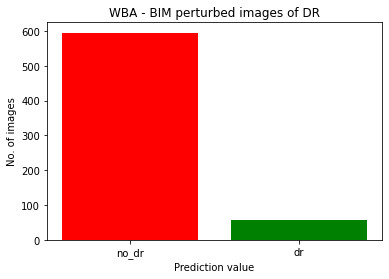

In [72]:
dr_img_pred_int = np.array(dr_img_pred_int)
no_zero = (dr_img_pred_int ==0).sum()
no_one = (dr_img_pred_int==1).sum()
print("Total no. of DR images = ", dr_pred_0.size)
print("Predicted as No DR = ",no_zero)
print("Predicted as DR = ", no_one)

plt.title('WBA - BIM perturbed images of DR')
plt.ylabel('No. of images')
plt.xlabel('Prediction value')
plt.bar(["no_dr", "dr"], [no_zero, no_one] , color=["red", "green"])
plt.show()

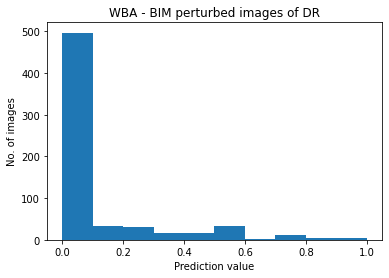

In [73]:
plt.title('WBA - BIM perturbed images of DR')
plt.ylabel('No. of images')
plt.xlabel('Prediction value')
plt.hist(dr_pred_0.astype('float'))
plt.show()

In [70]:
no_dr_img = np.array(no_dr_img)
no_dr0_pred = model.predict(no_dr_img)

In [74]:
no_dr_img_pred_int = []
for i in no_dr0_pred:
  if i < 0.5:
    no_dr_img_pred_int.append(0)
  else:
    no_dr_img_pred_int.append(1)

Total no. of No DR images =  1349
Predicted as No DR =  549
Predicted as DR =  800


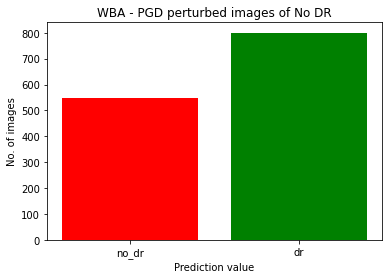

In [75]:
no_dr_img_pred_int = np.array(no_dr_img_pred_int)
no_zero = (no_dr_img_pred_int ==0).sum()
no_one = (no_dr_img_pred_int==1).sum()
print("Total no. of No DR images = ", no_dr0_pred.size)
print("Predicted as No DR = ",no_zero)
print("Predicted as DR = ", no_one)


plt.title('WBA - PGD perturbed images of No DR')
plt.ylabel('No. of images')
plt.xlabel('Prediction value')
plt.bar(["no_dr", "dr"], [no_zero, no_one] , color=["red", "green"])
plt.show()

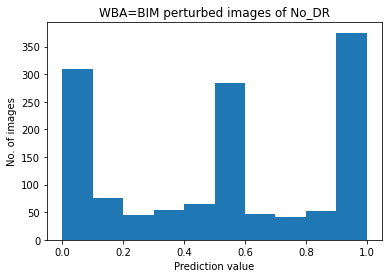

In [76]:
plt.title('WBA=BIM perturbed images of No_DR')
plt.ylabel('No. of images')
plt.xlabel('Prediction value')
plt.hist(no_dr0_pred.astype('float'))
plt.show()

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = []
y_pred = []
for i in dr_img_pred_int:
  y_pred.append(i)
  y_true.append(1)

for i in no_dr_img_pred_int:
  y_pred.append(i)
  y_true.append(0)

cnf = confusion_matrix(y_true, y_pred)
cnf

array([[549, 800],
       [595,  56]])

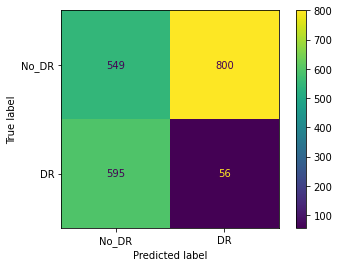

In [78]:
disp = ConfusionMatrixDisplay(cnf,display_labels=["No_DR", "DR"])
disp.plot()